# Project: Investigating The TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This **dataset** contains information about 10,000 movies collected from **The Movie Database (TMDb)**,
including user ratings and revenue.
I'll will be analysing this **dataset** to answer the following questions:
<li>    1- Which movie generated the highest revenue?
<li>    2- What are the top 5 highest grossing movies?
<li>    3- What attributes are associated with movies that have high revenues?
<li>    4- How's the profitability of the film-making industry over the years?
<li>    5- Which year had the highest number of movie releases?
<li>    6- Which genres are most popular from year to year?
<li>    7- Are movies run time getting longer or shorter over the years?

### Importing Packages For Analysis Process

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling

### General Properties

In [2]:
# Import data from csv file into pandas dataframe

df = pd.read_csv(r'C:\Users\Tolu\Desktop\tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# Check general properties of dataset like shape(number of columns and rows), info, dtypes
# null values etc.

df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Modify dataset by removing columns not relevant to the analysis

df.drop(columns=['homepage', 'tagline', 'keywords', 'overview', 'release_date', 'cast', 'director', 'budget_adj', 'revenue_adj', 'imdb_id'], inplace = True)

In [6]:
# Check for null values in the columns left

df.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
dtype: int64

There are missing values in the columns `genres` and `production_companies` before **EDA** can commence

## Data Cleaning

In [7]:
# Fill null values in genres and production_companies columns with 'Unknown'

df.fillna(value= "Unknown", inplace= True)

In [8]:
# Confirm there are no null values in dataframe

df.isna().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [9]:
# Check numerical values and arithmetic summaries for consistency

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


For the purpose of analysis `min revenue` should not be `0`, same with other statisctics reading `0` 

Replace `0` with `Nan` to drop these values.

In [10]:
# Fill '0' with 'NaN' in runtime, budget and revenue

df[['runtime', 'budget', 'revenue']]= df[['runtime', 'budget', 'revenue']].replace({0: np.nan})

In [11]:
df[['runtime', 'budget', 'revenue']]

,runtime,budget,revenue
0,124.0,150000000.0,1.513529e+09
1,120.0,150000000.0,3.784364e+08
2,119.0,110000000.0,2.952382e+08
3,136.0,200000000.0,2.068178e+09
4,137.0,190000000.0,1.506249e+09
...,...,...,...
10861,95.0,NaN,NaN
10862,176.0,NaN,NaN
10863,94.0,NaN,NaN
10864,80.0,NaN,NaN


In [12]:
# Drop Nan values

df.dropna(inplace=True)

In [13]:
df.shape

(3855, 11)

In [14]:
# Check for duplicates

df[df.duplicated()]

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year
2090,42194,0.59643,30000000.0,967000.0,TEKKEN,92.0,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,2010


In [15]:
# Drop duplicates

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [16]:
# Recheck dataframe for consistency

df.isna().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3854 non-null   int64  
 1   popularity            3854 non-null   float64
 2   budget                3854 non-null   float64
 3   revenue               3854 non-null   float64
 4   original_title        3854 non-null   object 
 5   runtime               3854 non-null   float64
 6   genres                3854 non-null   object 
 7   production_companies  3854 non-null   object 
 8   vote_count            3854 non-null   int64  
 9   vote_average          3854 non-null   float64
 10  release_year          3854 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 361.3+ KB


**Dataset** is now ready for **EDA**

## Exploratory Data Analysis

### Which movie generated the highest revenue?

In [18]:
# Create a new dataframe from the previously cleaned dataframe to sort title by revenue in descending order

df_rev= df[['original_title', 'revenue']].sort_values(by= ['revenue'], ascending= False).head(5).set_index(['original_title'])
df_rev

,revenue
original_title,
Avatar,2.781506e+09
Star Wars: The Force Awakens,2.068178e+09
Titanic,1.845034e+09
The Avengers,1.519558e+09
Jurassic World,1.513529e+09


The movie with the highest revenue is **Avatar**

###  What are the top 5 highest grossing movies?

In [19]:
# Define bar chart and its parameters

def barChart(Dataframe, x_label, y_label, title, size):
    Dataframe.plot.barh(figsize=size)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title, fontsize=20)
    plt.show()

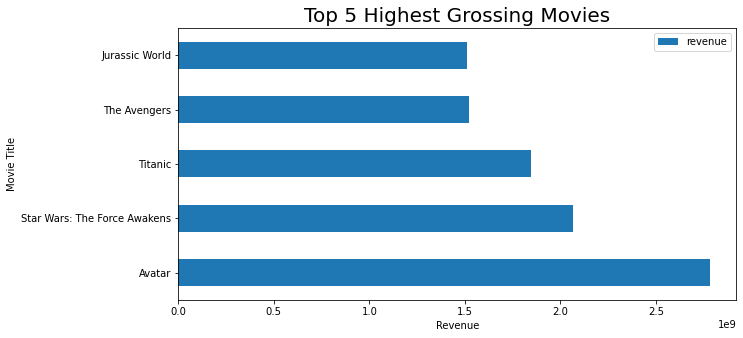

In [20]:
# Plot bar chart of top 5 titles by revenue

barChart(df_rev, 'Revenue', 'Movie Title', 'Top 5 Highest Grossing Movies', (10, 5))

                           The bar chart above shows the top 5 highest grossing movies

### What attributes are associated with movies that have high revenues?

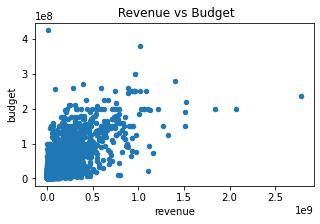

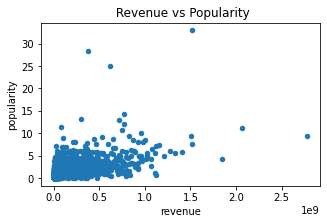

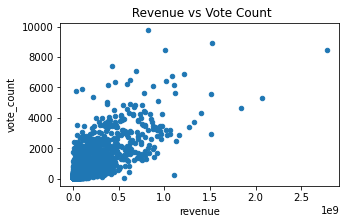

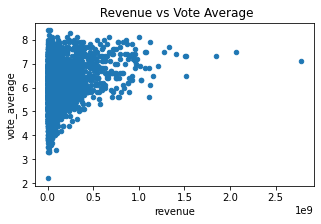

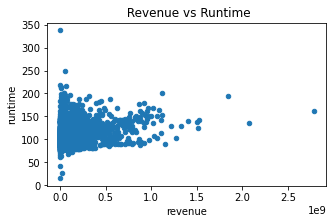

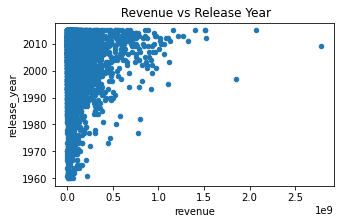

In [21]:
# Plot scatter plots showing relationship of numerical variables 

df.plot(kind='scatter', x='revenue', y='budget', figsize=(5,3), title=' Revenue vs Budget')
df.plot(kind='scatter', x='revenue', y='popularity', figsize=(5,3), title=' Revenue vs Popularity')
df.plot(kind='scatter', x='revenue', y='vote_count', figsize=(5,3), title=' Revenue vs Vote Count')
df.plot(kind='scatter', x='revenue', y='vote_average', figsize=(5,3), title=' Revenue vs Vote Average')
df.plot(kind='scatter', x='revenue', y='runtime', figsize=(5,3), title=' Revenue vs Runtime')
df.plot(kind='scatter', x='revenue', y='release_year', figsize=(5,3), title=' Revenue vs Release Year')
plt.show()

From the scatter plots above, we can infer the following:
<li> There is a strong positive correlation between budget and revenu. The higher the budget, the higher the revenue
<li> There is a weak positive correlation between popularity and revenue. More popularity does seem to impact revenue positively
<li> Positive correlation between revenue and vote count
<li> No real correlation between revenue and vote average can be determined
<li> No correlation between revenue and runtime
<li> Positive correlation between revenue and release year. Has years have gone by revenue has steadily increased 

###   How's the profitability of the film-making industry over the years?

In [22]:
# Create a profit column and extract a dataframe using the groupby function

df['profit'] = df['revenue'] - df['budget']
df_profit = df.groupby('release_year')['profit'].mean()

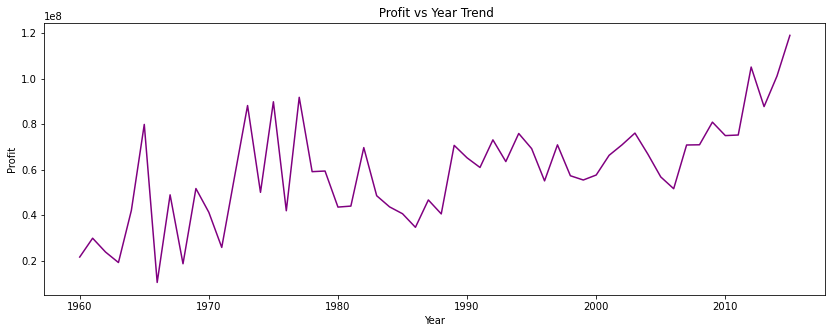

In [23]:
# Plot a line chart of Profit against Year

df_profit.plot(kind='line', x='release_year', xlabel='Year', y='profit', ylabel='Profit', figsize=(14,5), color='purple', title=' Profit vs Year Trend');

    From the line chart above we can see that the film_making industry has been steadily profitable over the years

### Which genres are most popular from year to year?

In [24]:
year = list(df['release_year'].unique())

In [25]:
A = []
B = set()

# Pull all the genres from the dataframe 
for i in df['genres']:
    A.append(i.split('|'))

# Extract unique genres into set
for i in A:
    for j in i:
        B.add(j)

# Convert set to list
genre = list(B)

In [26]:
data = []

for i in year:
    # Filter dataFrame by each year
    df_ = df[df['release_year'] == i][['release_year', 'genres']]
    
    # Find the number of occuring genre per year
    for j in genre:
        # Number of rows each genres occur
        count = df_['genres'].str.contains(j).sum()
        K = i, j, count
        data.append(K)

In [27]:
# Convert data into dataframe

df_genre = pd.DataFrame(data, columns=['year', 'genre', 'count']).sort_values(by=['year', 'count'], ascending=False)

In [28]:
#Select the most popular genres per year

most_popular = df_genre.groupby('year').head(1).set_index(['year', 'genre'])

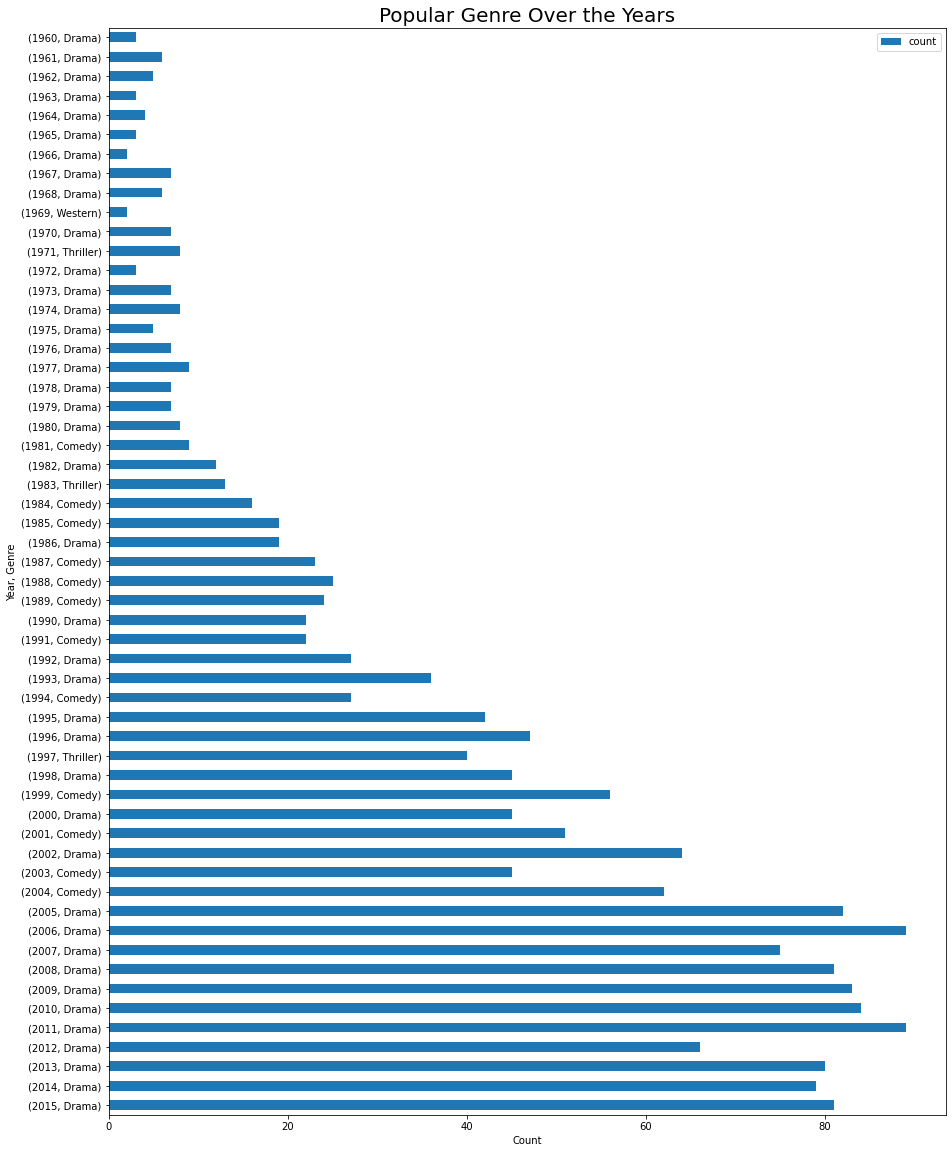

In [29]:
# Plot a chart for most popular genres by year

barChart(most_popular, 'Count', 'Year, Genre', 'Popular Genre Over the Years', (15, 20))

   From the bar chart above, `Drama` is the most popular genre over the years

###  Which year had the highest number of movie releases?

In [30]:
# Create a dataframe  

df_movie = df['release_year'].value_counts()
df_movie

2011    199
2013    180
2010    178
2009    174
2006    169
2008    167
2014    165
2007    165
2005    163
2015    160
2012    158
2004    147
2002    127
2003    121
2001    121
1999    116
2000    106
1998     92
1997     90
1996     86
1995     81
1993     72
1994     62
1988     57
1990     53
1992     53
1989     51
1991     50
1986     48
1987     46
1984     42
1985     41
1983     31
1981     30
1982     26
1980     23
1977     19
1978     17
1979     16
1976     15
1974     13
1971     13
1967     13
1973     12
1970     11
1961     10
1975      9
1968      9
1972      8
1964      7
1962      7
1963      6
1960      5
1965      5
1966      5
1969      4
Name: release_year, dtype: int64

The year with the highest number of movie releases is **2011**

###  Are movies run time getting longer or shorter over the years?

In [31]:
# Create a dataframe of the avg runtime of movies per year using the groupby function

df_runtime = df.groupby('release_year', as_index=False)['runtime'].mean()

In [32]:
# Define chart and its parameters

def chart(Dataframe, x_values, x_label, y_values, y_label, title, colour):
    Dataframe.plot(x=x_values, y=y_values, color=colour, figsize=(14,5), grid=True)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title, fontsize=16)
    plt.show()

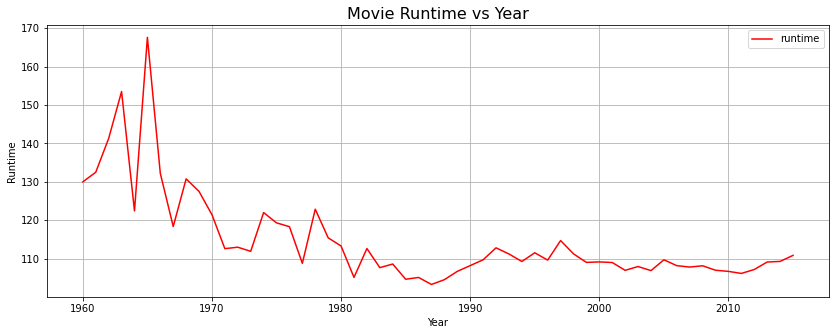

In [33]:
# Plot a line chart of avg Movie Runtime against Year

chart(df_runtime, 'release_year', 'Year', 'runtime', 'Runtime', 'Movie Runtime vs Year', 'red')

From the line chart we can see that movie runtimes have been getting shorter over the years

## Conclusion

After completing the analysis and answering the questions posed at the beginning of the analysis,

the following conclusions can be made:
<li> The highest grossing movie is Avatar directed by James Cameron
<li> Budget, popularity and vote count leads to high revenue
<li> More movies are produced per year
<li> The film-making industry grows increasingly profitable yearly
<li> Drama is the most popular genre over the years
<li> 2011 is the year with the highest movie releases
<li> Movie length or runtime have reduced over the years    

## Limitations

There were 10,866 observations in this raw dataset. There were null values and invalid values in certain columns. There were duplicate values also. These meant only 3,854 entries were used in the analysis.